In [1]:
# %matplotlib inline
from sklearn.tree import DecisionTreeClassifier,plot_tree

import pandas as pd
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import tree

# IMPORTING THE DATASET


In [2]:
data=pd.read_csv('C:\\Users\\bbhar\\\diabetes_data_upload.csv')

## CHECKINING IF THERE IS ANY NULL VALUES 

In [3]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# DATAPREPROCESSING

## CHECKINING IF THERE IS ANY NULL VALUES 

In [5]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
data.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df=data.copy()

In [8]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## ENCODING 

In [9]:
df['Gender'] = df ['Gender'].replace({'Female':0,'Male':1 })

In [10]:
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
515    0
516    0
517    0
518    0
519    1
Name: Gender, Length: 520, dtype: int64

In [11]:
for column in df.columns.drop(['Age','Gender','class']):
     df[column]= df[column].replace({'No':0 , 'Yes': 1})
        

In [12]:
df['class'] = df ['class'].replace({'Positive':0,'Negative':1 })

In [13]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1


# SPLITTING THE DEPENDENT AND INDEPENDENT ATTRIBUTES 

In [14]:
X=df.iloc[:,0:16]
y=df.iloc[:,16]
 

In [15]:
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
515    0
516    0
517    0
518    1
519    1
Name: class, Length: 520, dtype: int64

In [17]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [18]:
clf.score(X,y)

1.0

# VISUALIZING THE TREE 

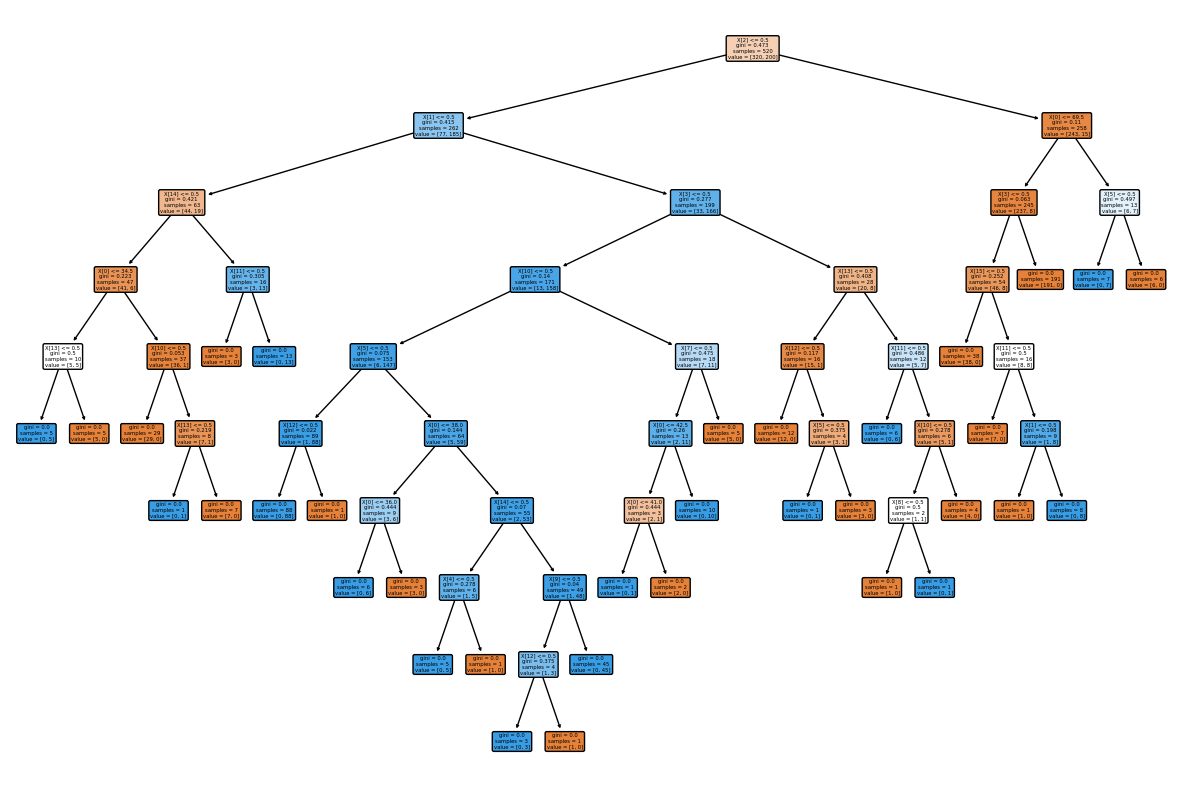

In [19]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, rounded=True)
plt.show()


# SPLITTING THE DATASET INTO TRAINING AND TEST DATA 

In [20]:
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=123)    

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index , columns=X_train.columns)

# VISUALIZIG THE ORIGINAL DATASET ,INDEPENDENT AND DEPENDENT ATTRIBUTES 

In [23]:
 df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1


In [24]:
X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
383,1.134527,0.790569,1.022225,-0.895533,-0.870893,0.841974,1.080123,1.797932,1.135477,1.050736,1.732051,1.116653,1.148247,-0.749821,-0.714404,-0.444262
121,-1.069324,0.790569,1.022225,1.116653,-0.870893,0.841974,1.080123,1.797932,-0.880687,1.050736,-0.577350,1.116653,1.148247,1.333651,-0.714404,-0.444262
485,0.625946,-1.264911,1.022225,1.116653,1.148247,-1.187685,1.080123,-0.556195,-0.880687,1.050736,-0.577350,1.116653,1.148247,-0.749821,-0.714404,-0.444262
91,0.032601,-1.264911,1.022225,1.116653,1.148247,0.841974,1.080123,-0.556195,1.135477,1.050736,1.732051,1.116653,1.148247,1.333651,-0.714404,-0.444262
162,-1.069324,-1.264911,-0.978258,-0.895533,-0.870893,-1.187685,-0.925820,-0.556195,-0.880687,-0.951714,-0.577350,-0.895533,-0.870893,-0.749821,-0.714404,-0.444262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,-1.069324,-1.264911,1.022225,1.116653,-0.870893,-1.187685,-0.925820,-0.556195,1.135477,-0.951714,-0.577350,-0.895533,-0.870893,-0.749821,1.399768,-0.444262
322,1.388817,0.790569,-0.978258,-0.895533,-0.870893,0.841974,1.080123,-0.556195,1.135477,1.050736,1.732051,1.116653,-0.870893,1.333651,1.399768,-0.444262
382,1.727871,0.790569,1.022225,1.116653,-0.870893,-1.187685,1.080123,-0.556195,1.135477,1.050736,1.732051,-0.895533,1.148247,-0.749821,-0.714404,-0.444262
365,-0.221689,-1.264911,-0.978258,-0.895533,-0.870893,-1.187685,1.080123,-0.556195,1.135477,1.050736,-0.577350,-0.895533,1.148247,-0.749821,-0.714404,-0.444262


In [25]:
y_train

383    0
121    0
485    0
91     0
162    0
      ..
98     0
322    1
382    0
365    0
510    1
Name: class, Length: 364, dtype: int64

# USING METRICS TO SEE HOW ACCURATE THE MODEL IS:

In [26]:
model_2=DecisionTreeClassifier()
model_2.fit(X_train,y_train)
y_pred=model_2.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("The accuracy is:",accuracy_score(y_test,y_pred)*100)

[[45 49]
 [ 3 59]]
The accuracy is: 66.66666666666666


# MODEL EVALUATION 

In [27]:
print("Train_score    :",model_2.score(X_train,y_train)*100)
print("Test_score     :",model_2.score(X_test,y_test)*100)

Train_score    : 100.0
Test_score     : 66.66666666666666
